In [107]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Data Cleaning

In [2]:
online = pd.read_csv('online_shoppers_intention.csv')

In [3]:
online.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


There seems to be some negative values for some columns. Let's take a look at what those columns are and possible substitutions or removals if possible.

In [4]:
online['Administrative_Duration'].unique()

array([  0.       ,  -1.       ,  53.       , ..., 167.9107143,
       305.125    , 150.3571429])

In [5]:
len(online[online['Administrative_Duration'] == -1])

33

In [6]:
len(online[online['Informational_Duration'] == -1])

33

In [7]:
len(online[online['ProductRelated_Duration'] == -1])

33

What is administrative duration?

- It is the total amount of time (in seconds) spent by the vistor on account management related pages.

What is informational duration?

- It is the total amount of time (in seconds) spent by the visitor on informational pages.

What is product related duration?

- It is the total amount of time (in seconds) spent on product related pages.

Due to only 33 observations with strange, negative values for duration of time, we can go ahead and remove them from our dataframe.


In [8]:
online = online[online['Administrative_Duration'] != -1]

In [9]:
online

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Let's also see if there are null values within the dataset.

In [10]:
online.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [11]:
online[online.isna().any(axis = 1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


In [12]:
online.dropna(inplace = True)

In [13]:
online.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Dummy Variables for Visitor Types
Convert Visitor Types into dummies, since there are 3 separate types of visitors.

In [14]:
online['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [15]:
online['VisitorType'].value_counts()

Returning_Visitor    10504
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [16]:
# Let's go ahead and convert Visitor Types to dummies.

visitors = pd.get_dummies(online['VisitorType'])

online = pd.concat([online, visitors], axis = 1)

In [17]:
online.drop('VisitorType', axis = 1, inplace = True)

### Months Conversion to Numbers

Construct a new column that will hold months as a number.

In [18]:
online['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [19]:
online['MonthNum'] = online['Month'].map({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9,
                     'Oct': 10, 'Nov': 11, 'Dec': 12})

In [20]:
online.drop('Month', axis = 1, inplace = True)

### Converting Revenue to Numbers

Since 'Revenue' will be our target variable, let's convert the boolean form into 0's and 1's (False and True).

In [21]:
online['Revenue_Num'] = online['Revenue'].apply(lambda x: 0 if x == False else 1)

In [22]:
online['Revenue_Num'].unique()

array([0, 1])

In [23]:
online.drop('Revenue', axis = 1, inplace = True)

### Convert Weekend to Number

Let's also convert weekend to 0's and 1's. 0 for not weekends, 1 for weekends.

In [24]:
online['Weekend_Num'] = online['Weekend'].apply(lambda x: 0 if x == False else 1)

In [25]:
online.drop('Weekend', axis = 1, inplace = True)

# EDA

Let's take a look at product related duration times and see if there are any outliers we can remove.

In [26]:
np.std(online['ProductRelated_Duration'])*3

5747.572358617515

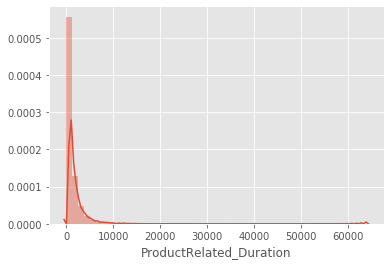

In [27]:
sns.distplot(online['ProductRelated_Duration'])

In [28]:
online[(online['ProductRelated_Duration'] > 5800)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,New_Visitor,Other,Returning_Visitor,MonthNum,Revenue_Num,Weekend_Num
66,4.0,44.000000,0.0,0.000000,90.0,6951.972222,0.002151,0.015013,0.000000,0.0,4,1,1,3,0,0,1,2,0,0
510,14.0,416.392857,6.0,449.333333,258.0,11301.204160,0.000000,0.007425,33.611792,0.0,2,4,9,2,0,0,1,3,1,0
611,16.0,315.144986,6.0,147.866667,173.0,6255.017866,0.002531,0.010737,0.000000,0.0,2,2,2,2,0,0,1,3,0,0
619,13.0,374.875000,1.0,53.000000,88.0,5958.071931,0.002105,0.009544,0.000000,0.0,2,2,3,2,0,0,1,3,0,0
769,15.0,937.174603,3.0,357.000000,109.0,6682.677557,0.000833,0.005345,2.526617,0.0,1,2,3,2,0,0,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12237,0.0,0.000000,0.0,0.000000,112.0,6673.291392,0.000000,0.008745,5.468093,0.0,2,4,1,3,0,0,1,11,0,0
12265,6.0,413.499612,0.0,0.000000,83.0,6072.032391,0.007059,0.024024,1.240071,0.0,3,2,8,1,0,0,1,11,1,1
12282,0.0,0.000000,0.0,0.000000,125.0,7453.766667,0.001626,0.013132,0.000000,0.0,2,2,3,2,0,0,1,11,0,0
12287,8.0,167.910714,6.0,547.750000,111.0,6340.152381,0.003361,0.009432,44.219794,0.0,3,2,6,2,0,0,1,12,0,0


In [29]:
online = online[online['ProductRelated_Duration'] <= 5800]

In [30]:
len(online)

11951

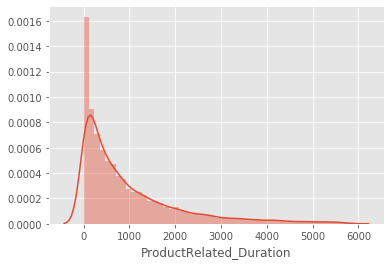

In [31]:
sns.distplot(online['ProductRelated_Duration'])

We decided to end the outliers limit at 5800 seconds for ProductDuration_Related, as that was 3 Standard Deviations. This eliminates around 332 observations to a total of 11,951 observations remaining in my dataset.

Let's take a look at Administrative_Duration outliers.

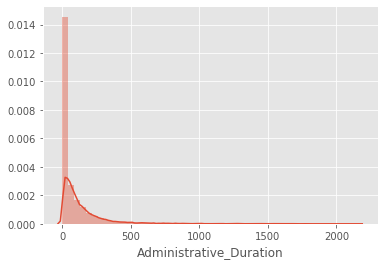

In [32]:
sns.distplot(online['Administrative_Duration'])

In [33]:
np.std(online['Administrative_Duration'])*3

490.2096261211964

In [34]:
online[online['Administrative_Duration'] > 531]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,New_Visitor,Other,Returning_Visitor,MonthNum,Revenue_Num,Weekend_Num
76,10.0,1005.666667,0.0,0.000000,36.0,2111.341667,0.004348,0.014493,11.439412,0.0,2,6,1,2,0,0,1,2,1,0
191,3.0,1226.000000,5.0,3.000000,24.0,3230.250000,0.036190,0.096000,0.000000,0.0,2,2,1,2,0,0,1,3,0,0
224,1.0,993.000000,0.0,0.000000,28.0,1529.304670,0.001481,0.009150,0.000000,0.0,3,2,4,2,0,0,1,3,0,0
231,6.0,666.833333,0.0,0.000000,22.0,1674.583333,0.000000,0.014667,0.000000,0.0,2,2,3,2,0,0,1,3,0,0
257,5.0,1388.750000,0.0,0.000000,4.0,1373.750000,0.000000,0.020000,0.000000,0.0,1,1,7,8,0,0,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12184,9.0,1294.900000,1.0,32.666667,37.0,1012.233333,0.000000,0.006910,33.312206,0.0,2,2,1,2,0,0,1,11,0,0
12188,7.0,533.591353,4.0,333.500000,85.0,5496.630355,0.010193,0.025284,5.145929,0.0,3,2,1,13,0,0,1,11,0,0
12194,2.0,698.500000,0.0,0.000000,41.0,1053.841565,0.002990,0.014327,0.000000,0.0,2,5,6,1,0,0,1,11,0,1
12230,6.0,580.333333,0.0,0.000000,43.0,1326.107143,0.018367,0.018160,0.000000,0.0,1,1,3,2,0,0,1,11,1,0


In [35]:
online = online[(online['Administrative_Duration'] <= 531)]

In [36]:
len(online)

11689

We set an outlier limit at 531 seconds for Administrative_Duration, since it is 3 Standard Deviations away from the original dataset's mean.

Let's also take a look at the Informational_Duration outliers.

In [37]:
np.std(online['Informational_Duration'])*3

361.21152918605765

/Users/rudywang/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


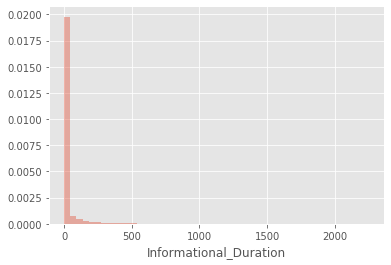

In [38]:
sns.distplot(online['Informational_Duration'])

In [39]:
online = online[online['Informational_Duration'] <= 422]

In [40]:
len(online)

11497

We set an outlier limit at 422 seconds for Informational_Duration, since it is 3 Standard Deviations away from the original dataset's mean. We end up with 11,497 total observations. We removed around 6% of our total dataset.

Let's also see which month generated the most revenue.

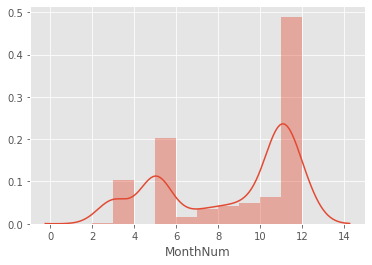

In [41]:
revenues = online[online['Revenue_Num'] == 1]

sns.distplot(revenues['MonthNum'])

Most sales transactions happened in November for the 1 year period.

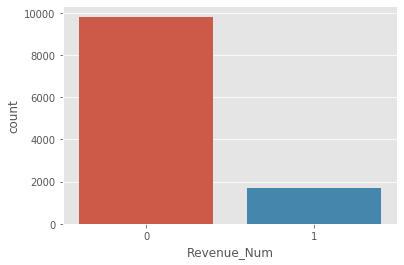

In [42]:
sns.countplot(online['Revenue_Num'])

In [43]:
online['Revenue_Num'].value_counts()

0    9811
1    1686
Name: Revenue_Num, dtype: int64

In [44]:
1686/(9811+1686)

0.14664695137862052

About 15% of the visitors generated revenue, while the other 85% did not. Might be a good idea to address class imbalance later.

## Correlations

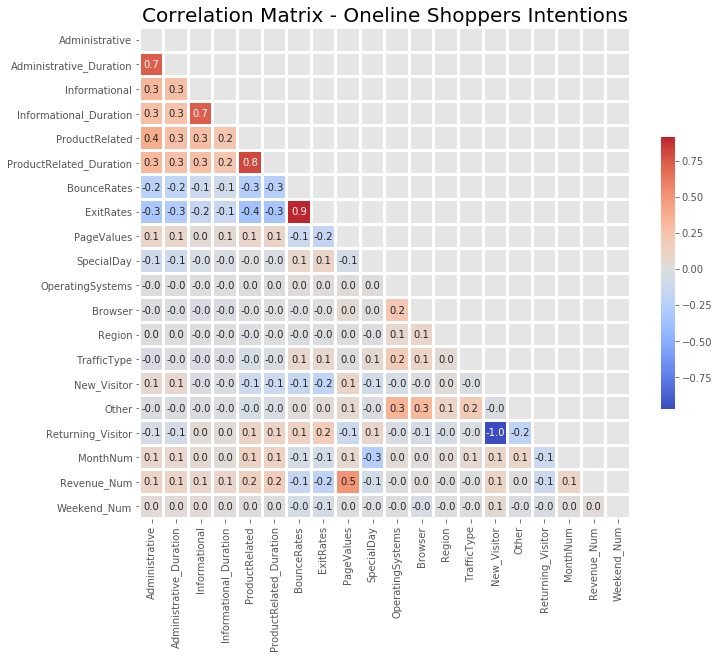

In [45]:
corr = online[online.columns].corr()

f, ax = plt.subplots(figsize = (11,10))

mask = np.triu(corr)

sns.heatmap(corr, linewidth = 2, mask = mask, cmap = 'coolwarm', center = 0, square = True, linewidths = .5, 
            cbar_kws = {'shrink': .5}, annot = True, fmt = '.1f')

plt.title('Correlation Matrix - Oneline Shoppers Intentions', fontsize = 20);

What is page value?
- The average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction.

In [255]:
online.corr()['Revenue_Num'].sort_values(ascending = False)

Revenue_Num                1.000000
PageValues                 0.512803
ProductRelated_Duration    0.170978
ProductRelated             0.150034
Administrative             0.125432
MonthNum                   0.117532
Administrative_Duration    0.114155
New_Visitor                0.113020
Informational_Duration     0.090177
Informational              0.087112
Weekend_Num                0.033544
Browser                    0.026082
Other                      0.008692
TrafficType               -0.000645
Region                    -0.005085
OperatingSystems          -0.013199
SpecialDay                -0.078745
Returning_Visitor         -0.112812
BounceRates               -0.148402
ExitRates                 -0.204277
Name: Revenue_Num, dtype: float64

In [47]:
online.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,New_Visitor,Other,Returning_Visitor,MonthNum,Revenue_Num,Weekend_Num
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,1,1,1,1,0,0,1,2,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2,0,0,1,2,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,0,0,1,2,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4,0,0,1,2,0,1
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2,2,1,3,0,0,1,2,0,0


# Baseline Models - Page Values

Chose one feature (highest correlation) to model with different class instances.

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
X = online[['PageValues']]#, 'ProductRelated', 'ProductRelated_Duration', 'Administrative', 'Administrative_Duration', 'ExitRates', 'MonthNum']]

y = online['Revenue_Num']

In [50]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [601]:
model = []

logreg = LogisticRegression(max_iter = 10000, class_weight={0: 1, 1: 5})
model.append(logreg)

knn = KNeighborsClassifier()
model.append(knn)

gmb = GaussianNB()
model.append(gmb)

svc = SVC(class_weight={0: 1, 1: 5})
model.append(svc)

dtc = DecisionTreeClassifier(class_weight={0: 1, 1: 5})#, max_depth=3,min_samples_leaf=0.1, min_samples_split=0.1)
model.append(dtc)

rfc = RandomForestClassifier(class_weight={0: 1, 1: 5})
model.append(rfc)

In [602]:
from collections import defaultdict

In [1036]:
baseline_dict = defaultdict(list)
for each in model:
    scores = cross_validate(each, X_train_val, y_train_val, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])
    baseline_dict[str(each)]
    y_pred = each.predict
    for score in scores:
        if score == 'fit_time' or score == 'score_time':
            continue
        else:
            baseline_dict[str(each)].append(f'{score}: {np.mean(scores[score]): .4f}')

In [1037]:
baseline_dict

defaultdict(list,
            {'LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=10000)': ['test_f1:  0.6697',
              'test_accuracy:  0.9034',
              'test_precision:  0.6682',
              'test_recall:  0.6716'],
             'KNeighborsClassifier()': ['test_f1:  0.6253',
              'test_accuracy:  0.8979',
              'test_precision:  0.6728',
              'test_recall:  0.5843'],
             'GaussianNB()': ['test_f1:  0.5373',
              'test_accuracy:  0.8963',
              'test_precision:  0.7674',
              'test_recall:  0.4134'],
             'SVC(class_weight={0: 1, 1: 5})': ['test_f1:  0.6810',
              'test_accuracy:  0.8931',
              'test_precision:  0.6036',
              'test_recall:  0.7821'],
             'DecisionTreeClassifier(class_weight={0: 1, 1: 5})': ['test_f1:  0.5835',
              'test_accuracy:  0.8890',
              'test_precision:  0.6445',
              'test_recall:  0.5336'],
             'Rand

It's quite clear that just having the 'PageValue' feature, we are achieving very high accuracy, moderate precision, and lower recall values among the models. Let's take a look at a comparison of the accuracy scores above with the null accuracy (accuracy that could be achieved by simply predicting the most frequent class).

## Null Accuracy

In [57]:
y_train_val.value_counts()

0    7857
1    1340
Name: Revenue_Num, dtype: int64

In [58]:
# Percentage of 0's
y_train_val.mean()

0.1456996846797869

In [59]:
# Percentage of 1's
1 - y_train_val.mean()

0.8543003153202131

In [60]:
# calculates null accuracy

max(y_train_val.mean(), 1 - y_train_val.mean())

0.8543003153202131

A dumb model that will always predict the majority class achieves an accuracy of 85%. Compared to our baseline models, it is a bit lower, but still very high. This obviously proves that we cannot solely rely on the accuracy score. Let's take a look at the confusion matricies below to see how well the model performed in terms of TP, TN, FP, FN.

Confusion Matrices for the different classes we instiantiated. 

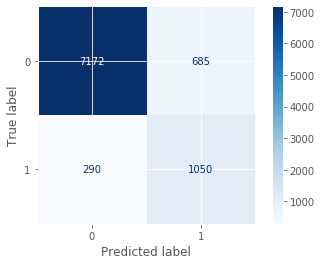

In [181]:
plot_confusion_matrix(svc.fit(X_train_scaled, y_train_val), X_train_scaled, y_train_val, cmap = plt.cm.Blues)

In [61]:
for each in model:
    fitted = each.fit(X_train_scaled,y_train)
    disp = plot_confusion_matrix(fitted, X_train_scaled, y_train, cmap=plt.cm.Blues)
    disp.ax_.set_title(each)

NameError: name 'y_train' is not defined

In [ ]:
ax = plt.gca()
for each in model:
    plot_roc_curve(each, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## Adding in Add. Features

Let's go ahead and add additonal features to see if we can bring up the precision and recall scores from our baseline models.

In [1442]:
X2 = online[['PageValues', 'ExitRates']] # 'ProductRelated', 'ProductRelated_Duration', 'Administrative', 'Administrative_Duration', 'ExitRates', 'MonthNum', 'New_Visitor']]

y2 = online['Revenue_Num']

In [1443]:
X2_train_val, X2_test, y_train_val, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 24)

In [1444]:
X2_train_scaled = scaler.fit_transform(X2_train_val)

In [1433]:
add_features_dict = defaultdict(list)
for each in model:
    scores = cross_validate(each, X2_train_scaled, y_train_val, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])
    add_features_dict[str(each)]
    y_pred = each.predict
    for score in scores:
        if score == 'fit_time' or score == 'score_time':
            continue
        else:
            add_features_dict[str(each)].append(f'{score}: {np.mean(scores[score]): .4f}')

In [1434]:
add_features_dict

defaultdict(list,
            {'LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=10000)': ['test_f1:  0.6749',
              'test_accuracy:  0.9033',
              'test_precision:  0.6620',
              'test_recall:  0.6888'],
             'KNeighborsClassifier()': ['test_f1:  0.6229',
              'test_accuracy:  0.8977',
              'test_precision:  0.6737',
              'test_recall:  0.5799'],
             'GaussianNB()': ['test_f1:  0.5765',
              'test_accuracy:  0.8994',
              'test_precision:  0.7454',
              'test_recall:  0.4701'],
             'SVC(class_weight={0: 1, 1: 5})': ['test_f1:  0.6810',
              'test_accuracy:  0.8945',
              'test_precision:  0.6100',
              'test_recall:  0.7716'],
             'DecisionTreeClassifier(class_weight={0: 1, 1: 5})': ['test_f1:  0.5417',
              'test_accuracy:  0.8670',
              'test_precision:  0.5444',
              'test_recall:  0.5396'],
             'Rand

When added additional features, the RandomForestClassifier improved in all of its scores.
When added additional features, LogisticRegression remained relatively stable with a slight drop in Recall Score.

## Adding in All Features

Let's go ahead and add all features to see if we are able to get better scores for our models.

In [610]:
online.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'New_Visitor',
       'Other', 'Returning_Visitor', 'MonthNum', 'Revenue_Num', 'Weekend_Num'],
      dtype='object')

In [1453]:
X3 = online[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'New_Visitor',
       'Other', 'Returning_Visitor', 'MonthNum', 'Weekend_Num']]

y3 = online['Revenue_Num']

In [1454]:
X3_train_val, X3_test, y_train_val, y_test = train_test_split(X3, y3, test_size = 0.2, random_state = 24)

In [1455]:
X3_train_scaled = scaler.fit_transform(X3_train_val)

In [1456]:
all_features_dict = defaultdict(list)
for each in model:
    scores = cross_validate(each, X3_train_scaled, y_train_val, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])
    all_features_dict[str(each)]
    y_pred = each.predict
    for score in scores:
        if score == 'fit_time' or score == 'score_time':
            continue
        else:
            all_features_dict[str(each)].append(f'{score}: {np.mean(scores[score]): .4f}')

In [1457]:
model

[LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=10000),
 KNeighborsClassifier(),
 GaussianNB(),
 SVC(class_weight={0: 1, 1: 5}),
 DecisionTreeClassifier(class_weight={0: 1, 1: 5}),
 RandomForestClassifier(class_weight={0: 1, 1: 5})]

In [1280]:
all_features_dict

defaultdict(list,
            {'LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=10000)': ['test_f1:  0.6448',
              'test_accuracy:  0.8858',
              'test_precision:  0.5906',
              'test_recall:  0.7104'],
             'KNeighborsClassifier()': ['test_f1:  0.5389',
              'test_accuracy:  0.8915',
              'test_precision:  0.7066',
              'test_recall:  0.4366'],
             'GaussianNB()': ['test_f1:  0.4579',
              'test_accuracy:  0.7557',
              'test_precision:  0.3384',
              'test_recall:  0.7082'],
             'SVC(class_weight={0: 1, 1: 5})': ['test_f1:  0.6489',
              'test_accuracy:  0.8844',
              'test_precision:  0.5825',
              'test_recall:  0.7328'],
             'DecisionTreeClassifier(class_weight={0: 1, 1: 5})': ['test_f1:  0.5548',
              'test_accuracy:  0.8725',
              'test_precision:  0.5651',
              'test_recall:  0.5455'],
             'Rand

In [1164]:
add_features_dict

defaultdict(list,
            {'LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=10000)': ['test_f1:  0.6749',
              'test_accuracy:  0.9033',
              'test_precision:  0.6620',
              'test_recall:  0.6888'],
             'KNeighborsClassifier()': ['test_f1:  0.6229',
              'test_accuracy:  0.8977',
              'test_precision:  0.6737',
              'test_recall:  0.5799'],
             'GaussianNB()': ['test_f1:  0.5765',
              'test_accuracy:  0.8994',
              'test_precision:  0.7454',
              'test_recall:  0.4701'],
             'SVC(class_weight={0: 1, 1: 5})': ['test_f1:  0.6810',
              'test_accuracy:  0.8945',
              'test_precision:  0.6100',
              'test_recall:  0.7716'],
             'DecisionTreeClassifier(class_weight={0: 1, 1: 5})': ['test_f1:  0.5412',
              'test_accuracy:  0.8672',
              'test_precision:  0.5451',
              'test_recall:  0.5381'],
             'Rand

In [1165]:
baseline_dict

defaultdict(list,
            {'LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=10000)': ['test_f1:  0.6697',
              'test_accuracy:  0.9034',
              'test_precision:  0.6682',
              'test_recall:  0.6716'],
             'KNeighborsClassifier()': ['test_f1:  0.6253',
              'test_accuracy:  0.8979',
              'test_precision:  0.6728',
              'test_recall:  0.5843'],
             'GaussianNB()': ['test_f1:  0.5373',
              'test_accuracy:  0.8963',
              'test_precision:  0.7674',
              'test_recall:  0.4134'],
             'SVC(class_weight={0: 1, 1: 5})': ['test_f1:  0.6810',
              'test_accuracy:  0.8931',
              'test_precision:  0.6036',
              'test_recall:  0.7821'],
             'DecisionTreeClassifier(class_weight={0: 1, 1: 5})': ['test_f1:  0.5835',
              'test_accuracy:  0.8890',
              'test_precision:  0.6445',
              'test_recall:  0.5336'],
             'Rand

# NEED TO EDIT THIS PART.

In [619]:
# Logistic Regression - 2 Features with weight.
best_log = ['test_f1:  0.6764',
              'test_accuracy:  0.9038',
              'test_precision:  0.6645',
              'test_recall:  0.6903']

In [ ]:
# KNeighborsClassifier - 1 Feature
['test_f1:  0.6253',
 'test_accuracy:  0.8979',
 'test_precision:  0.6728',
 'test_recall:  0.5843']

In [ ]:
# GaussianNB - Add Features

['test_f1:  0.5384',
 'test_accuracy:  0.8541',
 'test_precision:  0.5014',
 'test_recall:  0.5836']

In [1097]:
# SVC - 1 Features with Weight.

best_svc = ['test_f1:  0.6810',
              'test_accuracy:  0.8931',
              'test_precision:  0.6036',
              'test_recall:  0.7821']

**SVC** has the highest F1 score - I want to see if I would be able to increase the F1 score by tuning the hyperparameters and adjusting class weights.

In [253]:
# DecisionTreeClassifier - 1 Feature
['test_f1:  0.6483',
 'test_accuracy:  0.9020',
 'test_precision:  0.6809',
 'test_recall:  0.6216']

In [681]:
# RandomForestClassifier 1 - Feature

best_rfc = ['test_f1:  0.6419',
              'test_accuracy:  0.9087',
              'test_precision:  0.7514',
              'test_recall:  0.5619']

## Tuning SVC

In [1098]:
best_svc

['test_f1:  0.6810',
 'test_accuracy:  0.8931',
 'test_precision:  0.6036',
 'test_recall:  0.7821']

In [808]:
svc_weight = SVC(class_weight={0: 1, 1: 5}, C = 0.1, gamma = 1)

In [1099]:
svc_weight.fit(X_train_val, y_train_val)

SVC(C=0.1, class_weight={0: 1, 1: 5}, gamma=1)

In [1100]:
_ = cross_validate(svc_weight, X_train_val, y_train_val, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])

In [1101]:
svc_weight_scores = []
for score in _:
    svc_weight_scores.append(f'{score}: {np.mean(_[score]): .4f}')   

In [1102]:
svc_weight_scores

['fit_time:  0.2970',
 'score_time:  0.0502',
 'test_f1:  0.6837',
 'test_accuracy:  0.8911',
 'test_precision:  0.5938',
 'test_recall:  0.8067']

Used GridSearchCV to find the best hyperparameters to increase my F1 score for SVC.

In [626]:
param_grid = {'C': [0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 1], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale'],
              'kernel': ['rbf']}

grid = GridSearchCV(svc_weight, param_grid, refit = True, verbose = 3, scoring = 'f1') 

grid.fit(X_train_scaled, y_train_val) 

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.708, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.660, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.681, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.677, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.695, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.684, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.653, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.681, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.680, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.3min finished


GridSearchCV(estimator=SVC(class_weight={0: 1, 1: 5}),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale'],
                         'kernel': ['rbf']},
             scoring='f1', verbose=3)

In [627]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight={0: 1, 1: 5}, gamma=1)


Let's go ahead and see how it performs via testing data!

In [1103]:
X_train_scaled = scaler.fit_transform(X_train_val)

In [1104]:
X_test_scaled = scaler.transform(X_test)

In [1105]:
svc_test = cross_validate(svc_weight, X_test_scaled, y_test, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])

In [1106]:
svc_test_scores = []
for score in svc_test:
    svc_test_scores.append(f'{score}: {np.mean(_[score]): .4f}')   

In [1107]:
svc_test_scores

['fit_time:  0.2970',
 'score_time:  0.0502',
 'test_f1:  0.6837',
 'test_accuracy:  0.8911',
 'test_precision:  0.5938',
 'test_recall:  0.8067']

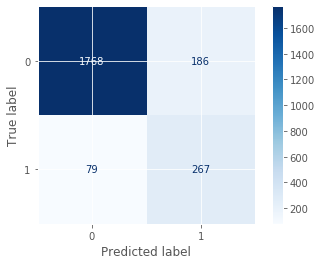

In [1424]:
plot_confusion_matrix(svc_weight.fit(X_train_scaled, y_train_val), X_test_scaled, y_test, cmap = plt.cm.Blues)

## Logistic Regression Tuning (Interpretable Model)

In [635]:
best_log

['test_f1:  0.6764',
 'test_accuracy:  0.9038',
 'test_precision:  0.6645',
 'test_recall:  0.6903']

In [1084]:
logreg_play = LogisticRegression(C=0.2, class_weight={0: 1, 1: 5})

In [1085]:
logreg_play.fit(X2_train_scaled, y_train_val)

LogisticRegression(C=0.2, class_weight={0: 1, 1: 5})

In [1086]:
_ = cross_validate(logreg_play, X2_train_scaled, y_train_val, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])

In [1087]:
log_play_scores = []
for score in _:
    log_play_scores.append(f'{score}: {np.mean(_[score]): .4f}')   

In [1088]:
log_play_scores

['fit_time:  0.0086',
 'score_time:  0.0043',
 'test_f1:  0.6749',
 'test_accuracy:  0.9033',
 'test_precision:  0.6620',
 'test_recall:  0.6888']

In [1025]:
list((scaler.inverse_transform(logreg_play.coef_), X2_train_val.columns))

[array([[4.82987754e+01, 3.31400128e-03]]),
 Index(['PageValues', 'ExitRates'], dtype='object')]

Used GridSearchCV to find the best hyperparameters to increase my F1 score for LogReg.

In [674]:
param_grid = {'C': [0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1, 100, 1000]}

grid = GridSearchCV(logreg_play, param_grid, refit = True, verbose = 3, scoring = 'f1') 

grid.fit(X2_train_scaled, y_train_val) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.1, solver=newton-cg .........................................
[CV] ............. C=0.1, solver=newton-cg, score=0.675, total=   0.0s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ............. C=0.1, solver=newton-cg, score=0.657, total=   0.0s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ............. C=0.1, solver=newton-cg, score=0.672, total=   0.0s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ............. C=0.1, solver=newton-cg, score=0.676, total=   0.0s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ............. C=0.1, solver=newton-cg, score=0.692, total=   0.0s
[CV] C=0.1, solver=lbfgs .............................................
[CV] ................. C=0.1, solver=lbfgs, score=0.675, total=   0.0s
[CV] C=0.1, solver=lbfgs .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............. C=0.1, solver=liblinear, score=0.658, total=   0.0s
[CV] C=0.1, solver=liblinear .........................................
[CV] ............. C=0.1, solver=liblinear, score=0.670, total=   0.0s
[CV] C=0.1, solver=liblinear .........................................
[CV] ............. C=0.1, solver=liblinear, score=0.676, total=   0.0s
[CV] C=0.1, solver=liblinear .........................................
[CV] ............. C=0.1, solver=liblinear, score=0.691, total=   0.0s
[CV] C=0.1, solver=sag ...............................................
[CV] ................... C=0.1, solver=sag, score=0.675, total=   0.0s
[CV] C=0.1, solver=sag ...............................................
[CV] ................... C=0.1, solver=sag, score=0.657, total=   0.0s
[CV] C=0.1, solver=sag ...............................................
[CV] ................... C=0.1, solver=sag, score=0.672, total=   0.0s
[CV] C=0.1, solver=sag ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    4.3s finished


GridSearchCV(estimator=LogisticRegression(C=0.2, class_weight={0: 1, 1: 5},
                                          solver='newton-cg'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                               100, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1', verbose=3)

In [675]:
print(grid.best_estimator_)

LogisticRegression(C=0.2, class_weight={0: 1, 1: 5}, solver='newton-cg')


Let's see how it performs on the testing holdout data!

In [1446]:
X2_train_scaled = scaler.fit_transform(X2_train_val)

In [1447]:
X2_test_scaled = scaler.transform(X2_test)

In [1448]:
_ = cross_validate(logreg_play, X2_test_scaled, y_test, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])

In [1449]:
log_test_scores = []
for score in _:
    log_test_scores.append(f'{score}: {np.mean(_[score]): .4f}')   

In [1450]:
log_test_scores

['fit_time:  0.0077',
 'score_time:  0.0053',
 'test_f1:  0.6767',
 'test_accuracy:  0.9004',
 'test_precision:  0.6630',
 'test_recall:  0.6936']

In [1451]:
list(((logreg_play.coef_), X2_train_val.columns))

[array([[ 2.25501275, -0.83186573]]),
 Index(['PageValues', 'ExitRates'], dtype='object')]

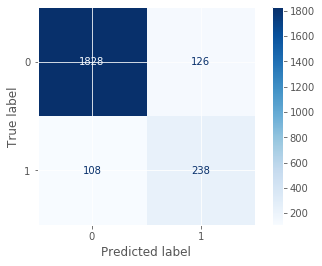

In [1452]:
plot_confusion_matrix(logreg_play.fit(X2_train_scaled, y_train_val), X2_test_scaled, y_test, cmap = plt.cm.Blues)

## XGBoostClassifier

In [1458]:
import xgboost as xgb
from sklearn.model_selection import KFold

In [1459]:
kf= KFold(n_splits=5,random_state=24,shuffle=True)

In [903]:
gbm_scores = defaultdict(list)

One Feature

In [1078]:
temp_list = []
for train_index, val_index in kf.split(X_train_val):
    count = 0
    X_train, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train, y_val = y_train_val.values[train_index], y_train_val.values[val_index]
    
    gbm = xgb.XGBClassifier( 
                      n_estimators=30000,
                        max_depth=6,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=2,
                        colsample_bytree=.9
                       )

    eval_set=[(X_train,y_train),(X_val,y_val)]
    gbm.fit( 
                    X_train_scaled, y_train_val, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

    temp_list.append(f1_score(y_val, (gbm.predict_proba(X_val, ntree_limit=gbm.best_ntree_limit) >= 0.50).astype(int)[:,1]))


print(np.mean(temp_list))

0.6889186969038463


In [983]:
np.mean(temp_list)

0.7045001843961549

All Features

In [1285]:
temp_list = []
for train_index, val_index in kf.split(X3_train_val):
    
    X_train, X_val = X3_train_scaled[train_index], X3_train_scaled[val_index]
    y_train, y_val = y_train_val.values[train_index], y_train_val.values[val_index]
    
    gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=7,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=2,
                        colsample_bytree=.9
                       )

    eval_set=[(X_train,y_train),(X_val,y_val)]
    gbm.fit( 
                    X3_train_scaled, y_train_val, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )
    
    temp_list.append(np.mean(f1_score(y_val, (gbm.predict_proba(X_val, ntree_limit=gbm.best_ntree_limit) >= 0.36).astype(int)[:,1])))
    #print(f1_score(y_val, gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit)) )

gbm_scores[gbm] = np.mean(temp_list)
print(np.mean(temp_list))   

0.9785330218841466


Let's see how it performs on the holdout testing dataset.

In [1460]:
X3_train_scaled = scaler.fit_transform(X3_train_val)

In [1461]:
X3_test_scaled = scaler.transform(X3_test)

In [1313]:
test_results = []
    
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=7,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=2,
                        colsample_bytree=.9
                       )

eval_set=[(X3_train_scaled,y_train_val),(X3_test_scaled,y_test)]
gbm.fit( 
                    X3_train_scaled, y_train_val, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )
test_results.append((f1_score(y_test, (gbm.predict_proba(X3_test_scaled, ntree_limit=gbm.best_ntree_limit) >= 0.36).astype(int)[:,1])))
#print(f1_score(y_test, gbm.predict(X3_test_scaled, ntree_limit=gbm.best_ntree_limit)) )

#gbm_scores[gbm] = np.mean(test_results)
print(np.mean(test_results))   

0.6964769647696476


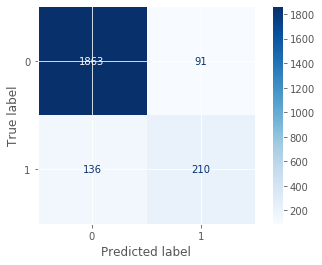

In [1462]:
plot_confusion_matrix(gbm.fit(X3_train_scaled, y_train_val), X3_test_scaled, y_test, cmap = plt.cm.Blues)

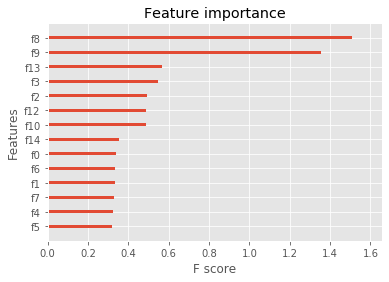

In [1468]:
#xgb.plot_importance(gbm)

xgb.plot_importance(gbm, importance_type='gain', show_values=False);

# Baseline Model - No Page Value

In [1469]:
X = online[['ProductRelated']] #, 'ProductRelated_Duration', 'Administrative', 'Administrative_Duration', 'ExitRates', 'MonthNum']]

y = online['Revenue_Num']

In [1470]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [1471]:
nopg_baseline_dict = defaultdict(list)
for each in model:
    scores = cross_validate(each, X_train_val, y_train_val, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])
    nopg_baseline_dict[str(each)]
    y_pred = each.predict
    for score in scores:
        if score == 'fit_time' or score == 'score_time':
            continue
        else:
            nopg_baseline_dict[str(each)].append(f'{score}: {np.mean(scores[score]): .4f}')

In [1472]:
nopg_baseline_dict

defaultdict(list,
            {'LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=10000)': ['test_f1:  0.2546',
              'test_accuracy:  0.7471',
              'test_precision:  0.2235',
              'test_recall:  0.2963'],
             'KNeighborsClassifier()': ['test_f1:  0.0877',
              'test_accuracy:  0.8287',
              'test_precision:  0.2019',
              'test_recall:  0.0575'],
             'GaussianNB()': ['test_f1:  0.1046',
              'test_accuracy:  0.8397',
              'test_precision:  0.2868',
              'test_recall:  0.0642'],
             'SVC(class_weight={0: 1, 1: 5})': ['test_f1:  0.3094',
              'test_accuracy:  0.5831',
              'test_precision:  0.2039',
              'test_recall:  0.6410'],
             'DecisionTreeClassifier(class_weight={0: 1, 1: 5})': ['test_f1:  0.2732',
              'test_accuracy:  0.6197',
              'test_precision:  0.1897',
              'test_recall:  0.4910'],
             'Rand

## Add Features

In [1473]:
X2 = online[['ExitRates', 'ProductRelated', 'ProductRelated_Duration', 'Administrative', 'Administrative_Duration', 'ExitRates', 'MonthNum', 'New_Visitor']]

y2 = online['Revenue_Num']

In [1474]:
X2_train_val, X2_test, y_train_val, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 24)

In [1475]:
X2_train_scaled = scaler.fit_transform(X2_train_val)

In [1476]:
nopg_add_features_dict = defaultdict(list)
for each in model:
    scores = cross_validate(each, X2_train_scaled, y_train_val, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])
    nopg_add_features_dict[str(each)]
    y_pred = each.predict
    for score in scores:
        if score == 'fit_time' or score == 'score_time':
            continue
        else:
            nopg_add_features_dict[str(each)].append(f'{score}: {np.mean(scores[score]): .4f}')

In [1477]:
nopg_add_features_dict

defaultdict(list,
            {'LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=10000)': ['test_f1:  0.3580',
              'test_accuracy:  0.6555',
              'test_precision:  0.2458',
              'test_recall:  0.6590'],
             'KNeighborsClassifier()': ['test_f1:  0.1856',
              'test_accuracy:  0.8332',
              'test_precision:  0.3215',
              'test_recall:  0.1306'],
             'GaussianNB()': ['test_f1:  0.3386',
              'test_accuracy:  0.6722',
              'test_precision:  0.2398',
              'test_recall:  0.5761'],
             'SVC(class_weight={0: 1, 1: 5})': ['test_f1:  0.3726',
              'test_accuracy:  0.6678',
              'test_precision:  0.2571',
              'test_recall:  0.6769'],
             'DecisionTreeClassifier(class_weight={0: 1, 1: 5})': ['test_f1:  0.2722',
              'test_accuracy:  0.7871',
              'test_precision:  0.2719',
              'test_recall:  0.2731'],
             'Rand

## All Features

In [1526]:
X3 = online[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'SpecialDay',
       'New_Visitor',
       'Other', 'Returning_Visitor', 'MonthNum', 'Weekend_Num']]

y3 = online['Revenue_Num']

In [1527]:
X3_train_val, X3_test, y_train_val, y_test = train_test_split(X3, y3, test_size = 0.2, random_state = 24)

In [1528]:
X3_train_scaled = scaler.fit_transform(X3_train_val)

In [1529]:
nopg_all_features_dict = defaultdict(list)
for each in model:
    scores = cross_validate(each, X3_train_scaled, y_train_val, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])
    nopg_all_features_dict[str(each)]
    y_pred = each.predict
    for score in scores:
        if score == 'fit_time' or score == 'score_time':
            continue
        else:
            nopg_all_features_dict[str(each)].append(f'{score}: {np.mean(scores[score]): .4f}')

In [1530]:
nopg_all_features_dict

defaultdict(list,
            {'LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=10000)': ['test_f1:  0.3637',
              'test_accuracy:  0.6575',
              'test_precision:  0.2494',
              'test_recall:  0.6716'],
             'KNeighborsClassifier()': ['test_f1:  0.1650',
              'test_accuracy:  0.8318',
              'test_precision:  0.2977',
              'test_recall:  0.1142'],
             'GaussianNB()': ['test_f1:  0.3411',
              'test_accuracy:  0.6690',
              'test_precision:  0.2402',
              'test_recall:  0.5881'],
             'SVC(class_weight={0: 1, 1: 5})': ['test_f1:  0.3680',
              'test_accuracy:  0.6717',
              'test_precision:  0.2560',
              'test_recall:  0.6560'],
             'DecisionTreeClassifier(class_weight={0: 1, 1: 5})': ['test_f1:  0.2610',
              'test_accuracy:  0.7891',
              'test_precision:  0.2665',
              'test_recall:  0.2560'],
             'Rand

When Page Value is removed from the models, the best performing models are again, Logistic Regression and SVC. Let's see how they perform for validation and testing results.

## Logistic Regression Tuning - All Features (No Page Value)

In [1483]:
nopg_logreg = LogisticRegression(max_iter = 10000, class_weight={0: 1, 1: 5}, C = 0.4)

In [1511]:
X3_train_scaled = scaler.fit_transform(X3_train_val)

In [1485]:
nopg_logreg.fit(X3_train_scaled, y_train_val)

LogisticRegression(C=0.4, class_weight={0: 1, 1: 5}, max_iter=10000)

In [1486]:
_ = cross_validate(nopg_logreg, X3_train_scaled, y_train_val, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])

nopg_logreg_scores = []
for score in _:
    nopg_logreg_scores.append(f'{score}: {np.mean(_[score]): .4f}')   

In [1487]:
nopg_logreg_scores

['fit_time:  0.0243',
 'score_time:  0.0064',
 'test_f1:  0.3639',
 'test_accuracy:  0.6578',
 'test_precision:  0.2496',
 'test_recall:  0.6716']

In [1187]:
param_grid = {'C': [0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1, 100, 1000]}

grid = GridSearchCV(nopg_logreg, param_grid, refit = True, verbose = 3, scoring = 'f1') 

grid.fit(X3_train_scaled, y_train_val) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.363, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.355, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.364, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.359, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.370, total=   0.0s
[CV] C=0.2 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... C=0.2, score=0.362, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.358, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.364, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.361, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.370, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.362, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.357, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.3s finished


GridSearchCV(estimator=LogisticRegression(class_weight={0: 1, 1: 5},
                                          max_iter=10000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                               100, 1000]},
             scoring='f1', verbose=3)

In [1188]:
print(grid.best_estimator_)

LogisticRegression(C=0.4, class_weight={0: 1, 1: 5}, max_iter=10000)


In [1512]:
X3_test_scaled = scaler.transform(X3_test)

_ = cross_validate(nopg_logreg, X3_test_scaled, y_test, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])

nopg_log_test_scores = []
for score in _:
    nopg_log_test_scores.append(f'{score}: {np.mean(_[score]): .4f}')   

nopg_log_test_scores

['fit_time:  0.0157',
 'score_time:  0.0057',
 'test_f1:  0.3729',
 'test_accuracy:  0.6630',
 'test_precision:  0.2596',
 'test_recall:  0.6679']

In [1488]:
list(((nopg_logreg.coef_), X3_train_val.columns))

[array([[ 0.05280881,  0.00196793,  0.01529494,  0.10133947, -0.1006071 ,
          0.28125676,  0.03712354, -1.33542689, -0.13883474,  0.07334032,
         -0.00185759, -0.07154023,  0.26323118,  0.04938798]]),
 Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates', 'SpecialDay', 'New_Visitor', 'Other',
        'Returning_Visitor', 'MonthNum', 'Weekend_Num'],
       dtype='object')]

In [1509]:
X3_test

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,New_Visitor,Other,Returning_Visitor,MonthNum,Weekend_Num
2394,0.0,0.00,0.0,0.0,10.0,173.250000,0.000000,0.024000,0.0,0,0,1,5,0
11635,2.0,20.75,0.0,0.0,22.0,868.678571,0.002778,0.019722,0.0,0,0,1,12,0
5505,0.0,0.00,0.0,0.0,16.0,519.866667,0.000000,0.000000,0.0,0,0,1,7,0
6694,2.0,35.30,0.0,0.0,2.0,20.100000,0.000000,0.000000,0.0,1,0,0,9,0
7887,0.0,0.00,0.0,0.0,18.0,1257.946667,0.000000,0.003922,0.0,0,0,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6903,1.0,0.00,0.0,0.0,24.0,991.422222,0.000000,0.008333,0.0,1,0,0,11,1
12297,0.0,0.00,0.0,0.0,6.0,139.750000,0.033333,0.066667,0.0,1,0,0,11,0
11809,0.0,0.00,0.0,0.0,4.0,302.000000,0.000000,0.040000,0.0,0,1,0,12,0
4768,0.0,0.00,0.0,0.0,17.0,697.516667,0.000000,0.017647,0.8,0,0,1,5,0


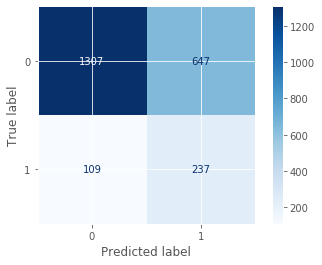

In [1513]:
plot_confusion_matrix(nopg_logreg.fit(X3_train_scaled, y_train_val), X3_test_scaled, y_test, cmap = plt.cm.Blues)

## SVC Tuning - Add. Features (No Page Value)

In [1200]:
svc_nopg = SVC(class_weight={0: 1, 1: 5}, C = 0.6, gamma = 0.1)

X2_train_scaled = scaler.fit_transform(X2_train_val)



In [1201]:
svc_nopg.fit(X2_train_scaled, y_train_val)

_ = cross_validate(svc_nopg, X2_train_scaled, y_train_val, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])

svc_nopg_scores = []
for score in _:
    svc_nopg_scores.append(f'{score}: {np.mean(_[score]): .4f}')   

svc_nopg_scores

['fit_time:  1.3989',
 'score_time:  0.1615',
 'test_f1:  0.3773',
 'test_accuracy:  0.6677',
 'test_precision:  0.2596',
 'test_recall:  0.6910']

In [1198]:
param_grid = {'C': [0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 1], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale'],
              'kernel': ['rbf']}

grid = GridSearchCV(svc_nopg, param_grid, refit = True, verbose = 3, scoring = 'f1') 

grid.fit(X2_train_scaled, y_train_val) 



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.372, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.346, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.380, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.378, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.358, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.365, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.353, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.380, total=   1.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.382, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  6.6min finished


GridSearchCV(estimator=SVC(class_weight={0: 1, 1: 5}),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale'],
                         'kernel': ['rbf']},
             scoring='f1', verbose=3)

In [1199]:
print(grid.best_estimator_)

SVC(C=0.6, class_weight={0: 1, 1: 5}, gamma=0.1)


In [1202]:
X2_test_scaled = scaler.transform(X2_test)

svc_test = cross_validate(svc_nopg, X2_test_scaled, y_test, cv = 5, scoring = ['f1', 'accuracy', 'precision', 'recall'])

svc_nopg_test = []
for score in svc_test:
    svc_nopg_test.append(f'{score}: {np.mean(_[score]): .4f}')   

svc_nopg_test

['fit_time:  1.3989',
 'score_time:  0.1615',
 'test_f1:  0.3773',
 'test_accuracy:  0.6677',
 'test_precision:  0.2596',
 'test_recall:  0.6910']

## XGBoost - No Page Values

In [1203]:
import xgboost as xgb
from sklearn.model_selection import KFold

kf= KFold(n_splits=5,random_state=24,shuffle=True)

In [1204]:
gbm_scores = defaultdict(list)

In [1514]:
X3_train_val

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,New_Visitor,Other,Returning_Visitor,MonthNum,Weekend_Num
8471,0.0,0.000000,0.0,0.0,49.0,1385.850000,0.000000,0.013265,0.0,0,0,1,12,0
5606,2.0,9.600000,3.0,118.1,10.0,184.100000,0.000000,0.035714,0.0,0,0,1,6,0
1158,0.0,0.000000,0.0,0.0,11.0,315.600000,0.000000,0.018182,0.0,0,0,1,3,1
5666,0.0,0.000000,1.0,0.0,7.0,1646.200000,0.025000,0.075000,0.0,0,0,1,6,0
1063,3.0,43.500000,0.0,0.0,30.0,2264.333333,0.000000,0.010417,0.0,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5532,5.0,271.000000,2.0,42.2,6.0,147.900000,0.000000,0.036364,0.0,1,0,0,8,1
11108,8.0,305.666667,1.0,0.0,35.0,796.250000,0.005556,0.011574,0.0,0,0,1,12,0
3661,0.0,0.000000,0.0,0.0,4.0,123.000000,0.000000,0.066667,0.0,0,0,1,5,0
9081,1.0,6.000000,0.0,0.0,14.0,1183.000000,0.000000,0.004762,0.0,1,0,0,11,1


In [1515]:
X3_train_scaled = scaler.fit_transform(X3_train_val)

In [1516]:
temp_list = []
for train_index, val_index in kf.split(X3_train_val):
    
    X_train, X_val = X3_train_scaled[train_index], X3_train_scaled[val_index]
    y_train, y_val = y_train_val.values[train_index], y_train_val.values[val_index]
    
    gbm = xgb.XGBClassifier( 
                       n_estimators=30000,
                        max_depth=7,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.7,
                        min_child_weight=5,
                        colsample_bytree=.8
                       )


    eval_set=[(X_train,y_train),(X_val,y_val)]
    gbm.fit( 
                    X3_train_scaled, y_train_val, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )
    
    temp_list.append(np.mean(f1_score(y_val, (gbm.predict_proba(X_val, ntree_limit=gbm.best_ntree_limit) >= 0.30).astype(int)[:,1])))
    #print(f1_score(y_val, gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit)) )

gbm_scores[gbm] = np.mean(temp_list)
print(np.mean(temp_list))   

0.906651605918792


In [1531]:
X3_test_scaled = scaler.transform(X3_test)

test_results = []
    
gbm = xgb.XGBClassifier( 
                       n_estimators=30000,
                        max_depth=7,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.7,
                        min_child_weight=5,
                        colsample_bytree=.8
                       )

eval_set=[(X3_train_scaled,y_train_val),(X3_test_scaled,y_test)]
gbm.fit( 
                    X3_train_scaled, y_train_val, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )
test_results.append((f1_score(y_test, (gbm.predict_proba(X3_test_scaled, ntree_limit=gbm.best_ntree_limit) >= 0.30).astype(int)[:,1])))
#print(f1_score(y_test, gbm.predict(X3_test_scaled, ntree_limit=gbm.best_ntree_limit)) )

#gbm_scores[gbm] = np.mean(test_results)
print(np.mean(test_results))   

0.426948051948052


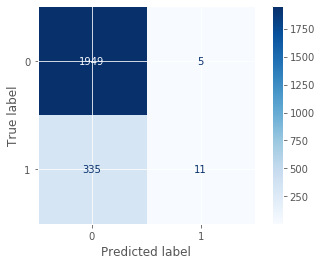

In [1518]:
plot_confusion_matrix(gbm.fit(X3_train_scaled, y_train_val), X3_test_scaled, y_test, cmap = plt.cm.Blues)

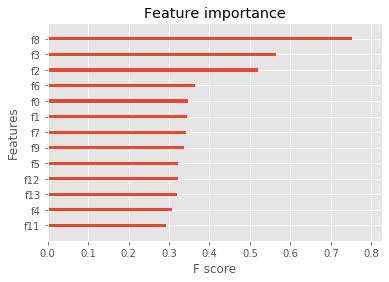

In [1519]:
xgb.plot_importance(gbm, importance_type='gain', show_values=False);